# IRIS FLOWER CLASSIFICATION_PROJECT

In our task is to train a machine learning model that can learn from the measurements of the species and classify them.

Iris flower has three species; setosa, versicolar, and viginia, which differs according to theier measurements.

STEPS FOLLOWED TO COMPLETE FOLLOWING PROJECT:
    
1. Read the Data:
   Loaded the dataset, identified the structure of data, including the numbers
   of samples, features and target variable.
        
2. Cleaning the Data: 
   Indentified and handled missing values and duplicates in the Iris dataset.
    
3. Exploratory Data Analysis(EDA): 
   Visualised the distribution of each feature, 
   explored the pairwise relationships between features.
  
  
4. Prepocess the Data:
   Performed feature scaling.
    
5. Split the Data into Training and Testing Sets:
   Split the dataset to into training and testing sets to evaluate the model's
   perfomance.
        
6. Train and Evaluate the Model:
   Trained logistic regression and decision tree models and evaluted each          Model's perfomance using appropicate evaluation metrics such as accuracy,      precision, F1-score, and confusion matrix.
    
7. Interpret the Results: 
   Analyzed the model's perfomance and understood its strengths and weaknesses.
   Checked which features are most influencial for Iris classification.
        
        

In [163]:
#Importing libraries

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [213]:
#Load(read) the dataset
iris = pd.read_csv('Iris.csv')

In [214]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [215]:
print(iris.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [216]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [217]:
#Identifying and Handling(removing) duplicates
iris.duplicated().sum()

3

IDENTIFYING AND HANDLING MISSING DATA

In [218]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

IDENTIFYING AND REMOVING DUPLICATES

In [219]:
iris.duplicated().sum()

3

In [ ]:
iris.drop_duplicates(inplace=True)

# EXPLORATORY DATA ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

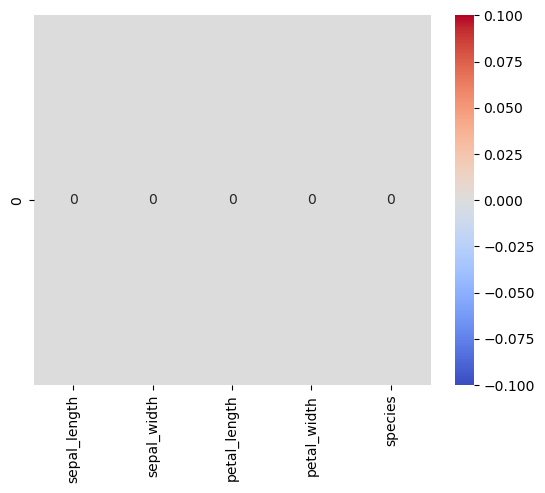

In [ ]:
#Heatmap of the missing values
sns.heatmap(iris.isnull().sum().to_frame().T, cmap='coolwarm', annot= True)
plt.show

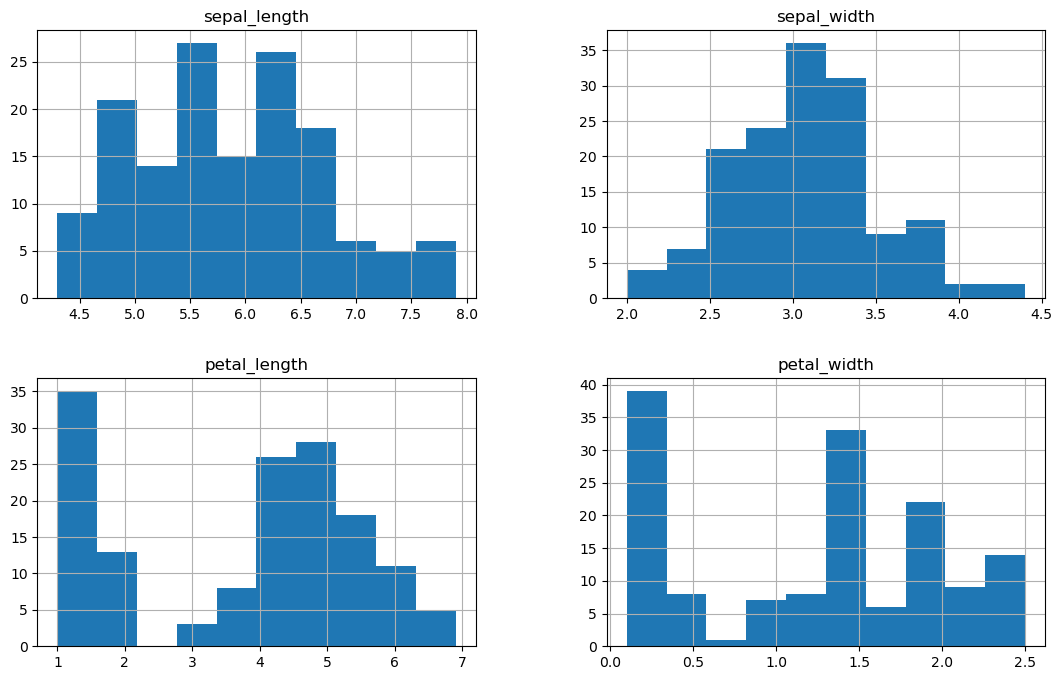

In [ ]:
import matplotlib.pyplot as plt
iris.hist(figsize= (17,5))
plt.show()

Visualizing the relationship between the Iris flower sepal_length and sepal_width.

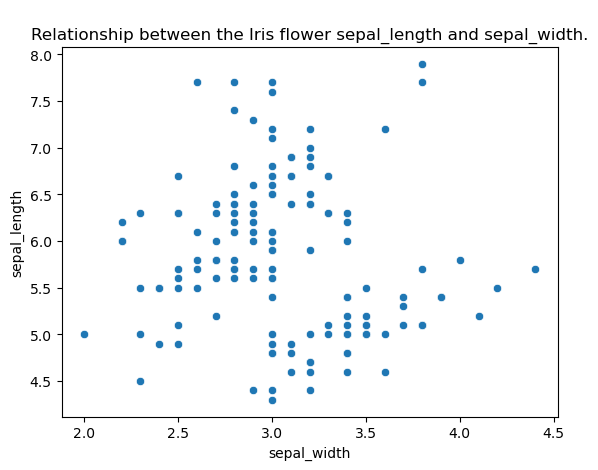

In [ ]:
import seaborn as sns

sns.scatterplot(data=iris, x="sepal_width", y="sepal_length")
plt.title("\nRelationship between the Iris flower sepal_length and sepal_width.")
plt.show()

Visualizing the relationship between the Iris flower petal_length and petal_width.

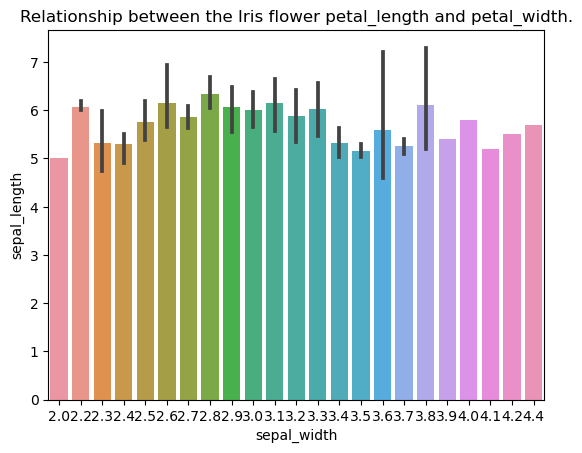

In [ ]:
sns.barplot(data=iris, x="sepal_width", y="sepal_length")
plt.title("Relationship between the Iris flower petal_length and petal_width.")
plt.show()

# MACHINE LEARNING MODELING:

TARGET VARIABLE

In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']

SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAINING THE MODEL:

I am going to train 2 Machine learning Models:
    
1. Logistic Regression Model
2. DecisionTreeRegressor Model

# Logistic Regression Model

In [ ]:
#Traing a logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

#predict
y_pred = lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Evaluaton metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Evaluation Metrics for Logistic Regression Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(confusion_matrix)

Evaluation Metrics for Logistic Regression Model:
Accuracy: 0.9333333333333333
Precision: 0.9296296296296296
Recall: 0.9296296296296296
F1-score: 0.9296296296296296
Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [ ]:
#Reshape the input data to make it 2-dimensional
iris = np.array([9, 3.9, 2, 0.9]).reshape(1, -1)
iris = lg.predict(iris)
print("Prediction: {}".format(iris))

Prediction: ['Iris-versicolor']


C:\Users\masel\OneDrive\Desktop\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DecisionTreeRegressor Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the decision tree regressor
dtr.fit(X_train, y_train_encoded)

# Display the dataset after encoding the target variable
print("Encoded Target Variable (y_train_encoded):")
print(y_train_encoded)

Encoded Target Variable (y_train_encoded):
[2 0 2 0 0 2 2 2 0 0 0 2 1 2 1 1 2 2 0 1 1 0 0 1 0 0 0 2 1 2 0 0 2 0 1 2 0
 1 2 0 1 2 1 2 1 1 0 2 1 1 0 1 1 0 2 0 0 1 1 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2
 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 1 1 2 0 1 1 0 2 0 2 0 1 2 2 2 2 1 1 2 2
 0 1 2 0 1 2]


In [ ]:
#Traing a logistic regression model
dtr = DecisionTreeRegressor()
# Train the decision tree regressor
dtr.fit(X_train, y_train_encoded)

# Predict
y_pred = dtr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert numerical predictions back to string labels
y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='macro')
recall = recall_score(y_test, y_pred_labels, average='macro')
f1 = f1_score(y_test, y_pred_labels, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Print evaluation metrics
print("Evaluation Metrics for Decision Tree Regression Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Evaluation Metrics for Decision Tree Regression Model:
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1-score: 0.9649122807017544
Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [ ]:
iris = np.array([9, 3.9, 2, 0.9]).reshape(1, -1)

#Predict
prediction = dtr.predict(iris)

print("Prediction: {}".format(prediction))

print("Prediction:{}".format(prediction))


Prediction: [1.]


C:\Users\masel\OneDrive\Desktop\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


INTERPRETING THE MODELS RESULTS:

Influential features on Iris Classification.

In [ ]:
#extracting feature importances
feature_importances = pd.Series(lg.coef_[0], index=X.columns).sort_values()

#print the most influencial features for iris flower classification
print("\nFeatures that are most important for iris flower classification:")
print(feature_importances)


Features that are most important for iris flower classification:
petal_length   -2.392774
petal_width    -0.947798
sepal_length   -0.500379
sepal_width     0.834276
dtype: float64


COMPLETE!!!!